In [1]:
# Ralph_Lauren_Sales_Profit_Demo.ipynb

# 📌 Cell 1 — Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [2]:
# Create a synthetic dataset for Ralph Lauren sales, profit and demographics

np.random.seed(42)  # reproducible

# Sample size
n = 1200

# Regions
regions = ["North America", "Europe", "Asia Pacific", "UK", "Latin America"]

# Age groups
age_groups = ["18-24","25-34","35-44","45-54","55+"]

# Generate Data
data = {
    "OrderID": np.arange(1, n+1),
    "Region": np.random.choice(regions, n),
    "AgeGroup": np.random.choice(age_groups, n),
    "ProductCategory": np.random.choice(["Polo Shirts","Jeans","Outerwear","Accessories","Footwear"], n),
    "Sales": np.round(np.random.uniform(50, 1200, n), 2),
}

df = pd.DataFrame(data)

# Profit = Sales * (random margin between 15% and 50%)
df["ProfitMargin"] = np.round(np.random.uniform(0.15, 0.50, n), 2)
df["Profit"] = np.round(df["Sales"] * df["ProfitMargin"], 2)

df.head()

,OrderID,Region,AgeGroup,ProductCategory,Sales,ProfitMargin,Profit
0,1,UK,25-34,Accessories,154.33,0.37,57.10
1,2,Latin America,45-54,Accessories,87.51,0.49,42.88
2,3,Asia Pacific,35-44,Jeans,116.36,0.42,48.87
3,4,Latin America,18-24,Jeans,561.02,0.30,168.31
4,5,Latin America,35-44,Jeans,366.88,0.31,113.73


In [3]:
# Summary of dataset
df.describe()

,OrderID,Sales,ProfitMargin,Profit
count,1200.000000,1200.000000,1200.000000,1200.000000
mean,600.500000,625.690533,0.322383,201.491533
std,346.554469,327.935144,0.100534,128.378784
min,1.000000,52.320000,0.150000,11.110000
25%,300.750000,341.862500,0.240000,97.992500
50%,600.500000,632.905000,0.320000,179.450000
75%,900.250000,912.940000,0.410000,279.655000
max,1200.000000,1199.480000,0.500000,576.980000


/var/folders/88/w4w1n8l12kd_z42_6mrnndmw0000gn/T/ipykernel_86060/4161255398.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.index, y=region_sales.values, palette="viridis")


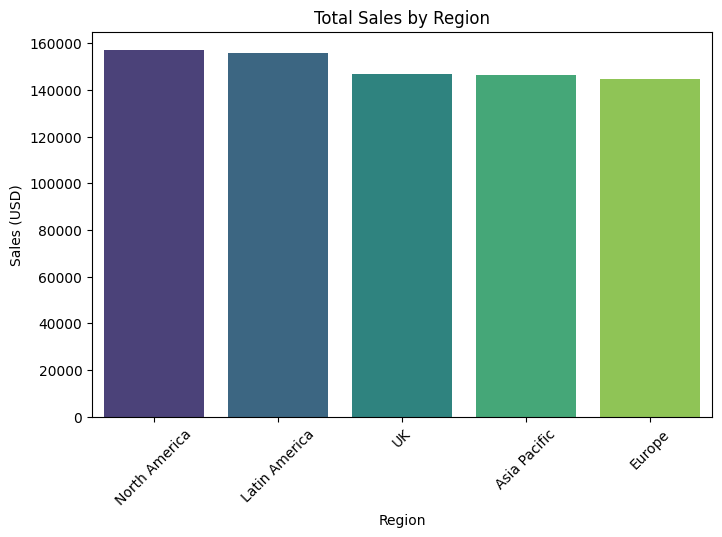

In [4]:
region_sales = df.groupby("Region")["Sales"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=region_sales.index, y=region_sales.values, palette="viridis")
plt.title("Total Sales by Region")
plt.ylabel("Sales (USD)")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.show()

/var/folders/88/w4w1n8l12kd_z42_6mrnndmw0000gn/T/ipykernel_86060/1452504954.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_margin.index, y=age_margin.values, palette="magma")


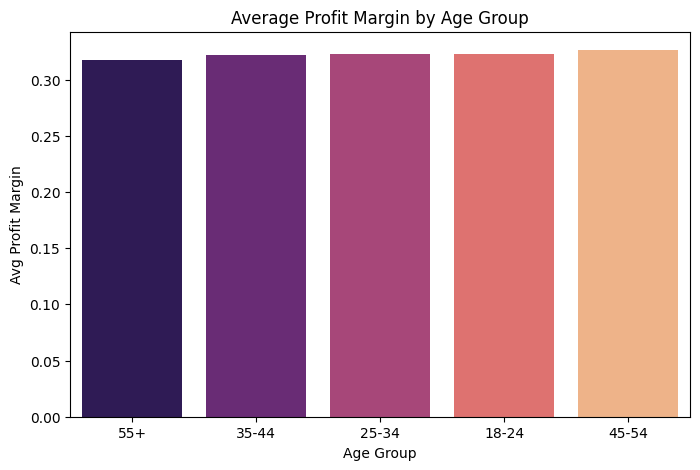

In [5]:
age_margin = df.groupby("AgeGroup")["ProfitMargin"].mean().sort_values()

plt.figure(figsize=(8,5))
sns.barplot(x=age_margin.index, y=age_margin.values, palette="magma")
plt.title("Average Profit Margin by Age Group")
plt.ylabel("Avg Profit Margin")
plt.xlabel("Age Group")
plt.show()

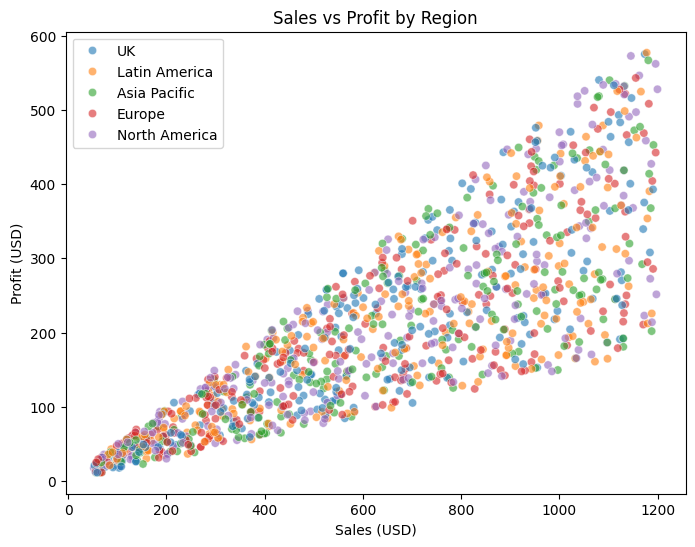

In [6]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Sales", y="Profit", hue="Region", alpha=0.6)
plt.title("Sales vs Profit by Region")
plt.xlabel("Sales (USD)")
plt.ylabel("Profit (USD)")
plt.legend()
plt.show()

In [7]:
top10 = df.sort_values(by="Profit", ascending=False).head(10)
top10[["OrderID","Region","ProductCategory","Sales","Profit","ProfitMargin"]]

,OrderID,Region,ProductCategory,Sales,Profit,ProfitMargin
415,416,Latin America,Outerwear,1177.50,576.98,0.49
199,200,UK,Jeans,1173.67,575.10,0.49
152,153,North America,Jeans,1145.34,572.67,0.50
536,537,Asia Pacific,Jeans,1180.80,566.78,0.48
267,268,North America,Accessories,1195.70,561.98,0.47
560,561,North America,Jeans,1162.35,546.30,0.47
571,572,Europe,Polo Shirts,1155.33,543.01,0.47
79,80,UK,Polo Shirts,1080.45,540.22,0.50
196,197,Asia Pacific,Jeans,1101.94,539.95,0.49
218,219,North America,Outerwear,1114.35,534.89,0.48


In [8]:
df.to_csv("Ralph_Lauren_Sales_Profit_Demographics.csv", index=False)
print("Dataset exported ✔️")

Dataset exported ✔️
